# Importing Libraries

In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn.linear_model import LogisticRegression

# Loading in the datset

In [44]:
# Read in the CSV file onto a Pandas dataframe
#df = pd.read_csv("/Users/andrewchavarria/Desktop/JupyterLab/COVID19 Dataset/Covid Data.csv")

import io
import requests
url="https://www.kaggle.com/datasets/meirnizri/covid19-dataset/download?datasetVersionNumber=1"
s=requests.get(url).content
c=pd.read_csv(io.StringIO(s.decode('utf-8')))



ParserError: Error tokenizing data. C error: Expected 1 fields in line 9, saw 2


# Exploring the dataset

In [3]:
print("Number of entries: "+ str(len(df)))
print("Dataset shape: "+ str(df.shape))

Number of entries: 1048575
Dataset shape: (1048575, 21)


In [4]:
pd.set_option("display.max.columns", None)
pd.set_option("display.precision", 2)
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,2,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,2,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,2,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,2,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,2,2,2,1,2,2,2,2,2,3,97


In [5]:
# Let's get to know our datatypes for the 21 columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [6]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [7]:
df.describe(include=[object, int])

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,1048575.000,1048575.000,1048575.000,1048575.000,1048575,1048575.000,1048575.000,1048575.000,1048575.000,1048575.000,1048575.000,1048575.000,1048575.000,1048575.000,1048575.000,1048575.000,1048575.000,1048575.000,1048575.000,1048575.000,1048575.000
unique,NaN,NaN,NaN,NaN,401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,9999-99-99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,971633,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.632,8.981,1.499,1.191,NaN,79.523,3.347,41.794,49.766,2.186,2.261,2.243,2.298,2.129,2.435,2.262,2.125,2.257,2.214,5.306,79.554
std,0.482,3.723,0.500,0.393,NaN,36.869,11.913,16.907,47.511,5.424,5.132,5.114,5.463,5.236,6.647,5.195,5.175,5.135,5.323,1.881,36.823
min,1.000,1.000,1.000,1.000,NaN,1.000,1.000,0.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
25%,1.000,4.000,1.000,1.000,NaN,97.000,2.000,30.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,3.000,97.000
50%,2.000,12.000,1.000,1.000,NaN,97.000,2.000,40.000,97.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,6.000,97.000
75%,2.000,12.000,2.000,1.000,NaN,97.000,2.000,53.000,97.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,7.000,97.000


In [8]:
for col in df.columns:
    print("Unique count for "+col+": "+ str(len(df[col].unique())))

Unique count for USMER: 2
Unique count for MEDICAL_UNIT: 13
Unique count for SEX: 2
Unique count for PATIENT_TYPE: 2
Unique count for DATE_DIED: 401
Unique count for INTUBED: 4
Unique count for PNEUMONIA: 3
Unique count for AGE: 121
Unique count for PREGNANT: 4
Unique count for DIABETES: 3
Unique count for COPD: 3
Unique count for ASTHMA: 3
Unique count for INMSUPR: 3
Unique count for HIPERTENSION: 3
Unique count for OTHER_DISEASE: 3
Unique count for CARDIOVASCULAR: 3
Unique count for OBESITY: 3
Unique count for RENAL_CHRONIC: 3
Unique count for TOBACCO: 3
Unique count for CLASIFFICATION_FINAL: 7
Unique count for ICU: 4


Most of the features are binary (1 = yes, 2 = no), and they only have 3-4 unique values because the remaining (apart from 1 and 2) signify a missing value.

In [9]:
# Check the percentage of missing values per feature

for col in df.columns:
    
    percentage = len(df[ (df[col]==97) | (df[col]==98) | (df[col]==99) ]) / len(df[col]) * 100
    print("Missing value percentage of "+col+": "+ 
          "%.2f" % percentage + '%:')

Missing value percentage of USMER: 0.00%:
Missing value percentage of MEDICAL_UNIT: 0.00%:
Missing value percentage of SEX: 0.00%:
Missing value percentage of PATIENT_TYPE: 0.00%:
Missing value percentage of DATE_DIED: 0.00%:
Missing value percentage of INTUBED: 81.62%:
Missing value percentage of PNEUMONIA: 1.53%:
Missing value percentage of AGE: 0.03%:
Missing value percentage of PREGNANT: 50.28%:
Missing value percentage of DIABETES: 0.32%:
Missing value percentage of COPD: 0.29%:
Missing value percentage of ASTHMA: 0.28%:
Missing value percentage of INMSUPR: 0.32%:
Missing value percentage of HIPERTENSION: 0.30%:
Missing value percentage of OTHER_DISEASE: 0.48%:
Missing value percentage of CARDIOVASCULAR: 0.29%:
Missing value percentage of OBESITY: 0.29%:
Missing value percentage of RENAL_CHRONIC: 0.29%:
Missing value percentage of TOBACCO: 0.31%:
Missing value percentage of CLASIFFICATION_FINAL: 0.00%:
Missing value percentage of ICU: 81.64%:


ICU and INTUBED contain mostly missing values, so we'll remove those from the dataset. PREGNANT not applicable when the patient is male, which is why roughly 50% of the values for it are "missing". 

# Preprocessing

In [10]:
# Remove the columns with too many missing values
df = df.drop(['ICU', 'INTUBED'], axis=1)

In [11]:
# Change male pregnancy status to '2' to signify it is a male
df['PREGNANT'] = df['PREGNANT'].replace(97,2)
df['PREGNANT'] = df['PREGNANT'].replace(98,2)

In [12]:
# Remove the entries containing missing values
for col in df.columns:
    df = df[df[col] != 97]
    df = df[df[col] != 98]
    df = df[df[col] != 99]

In [13]:
# Add a column for whether or not the patient died (which is what we will be using as our target)
# 1 indicates that the patient died
df['DIED'] = 1

In [14]:
# Set DIED value to 2 (no) if DATE_DIED == '9999-99-99' (indicating patient died)
df['DIED'] = df.apply(lambda row: 2 if ((row['DATE_DIED'] == '9999-99-99')) else 1, axis=1)

In [15]:
df = df.drop('DATE_DIED', axis=1)

# Data Visualization

[Text(0, 0, '74612'), Text(0, 0, '950217')]

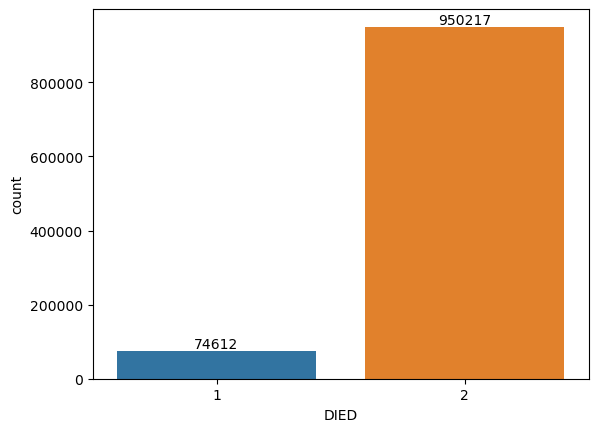

In [16]:
ax = sns.countplot(x=df["DIED"])
plt.bar_label(ax.containers[0])

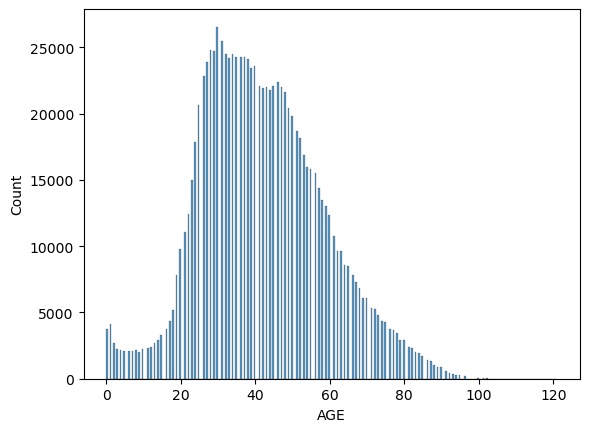

In [17]:
# Distribution of age in our dataset
sns.histplot(df['AGE'])
plt.show()

In [18]:
# distribution of age for those who died vs. those who didn't die

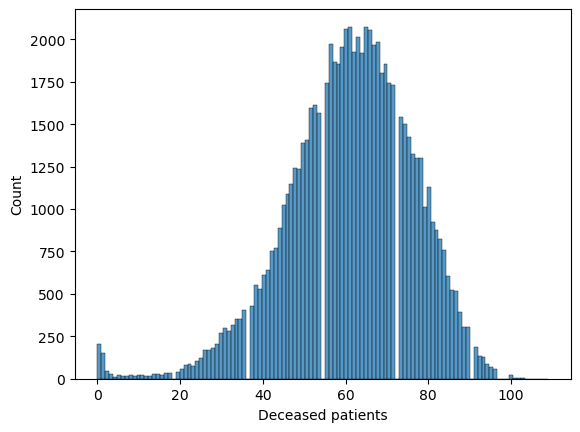

In [19]:
df_died = df[df['DIED'] == 1]
# Distribution of age in our dataset
ax = sns.histplot(df_died['AGE'])
ax.set_xlabel("Deceased patients")
plt.show()

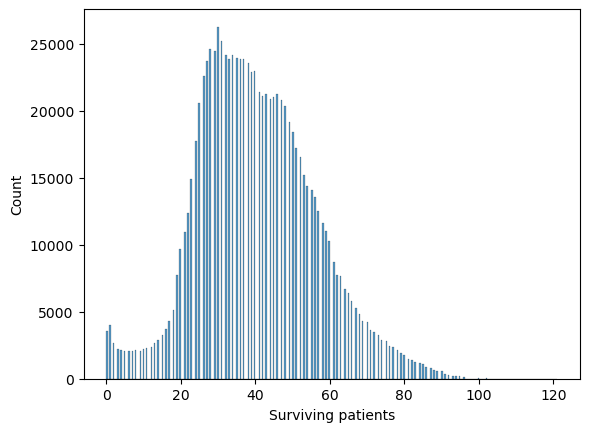

In [20]:
df_died = df[df['DIED'] == 2]
# Distribution of age in our dataset
ax = sns.histplot(df_died['AGE'])
ax.set_xlabel("Surviving patients")
plt.show()

In [21]:
df.groupby('DIED').agg({'AGE': ['mean']})

,AGE
,mean
DIED,
1,61.097
2,40.360


Above we see that the mean age for deceased patients is over 20 years above the mean age of survining patients.

<AxesSubplot: >

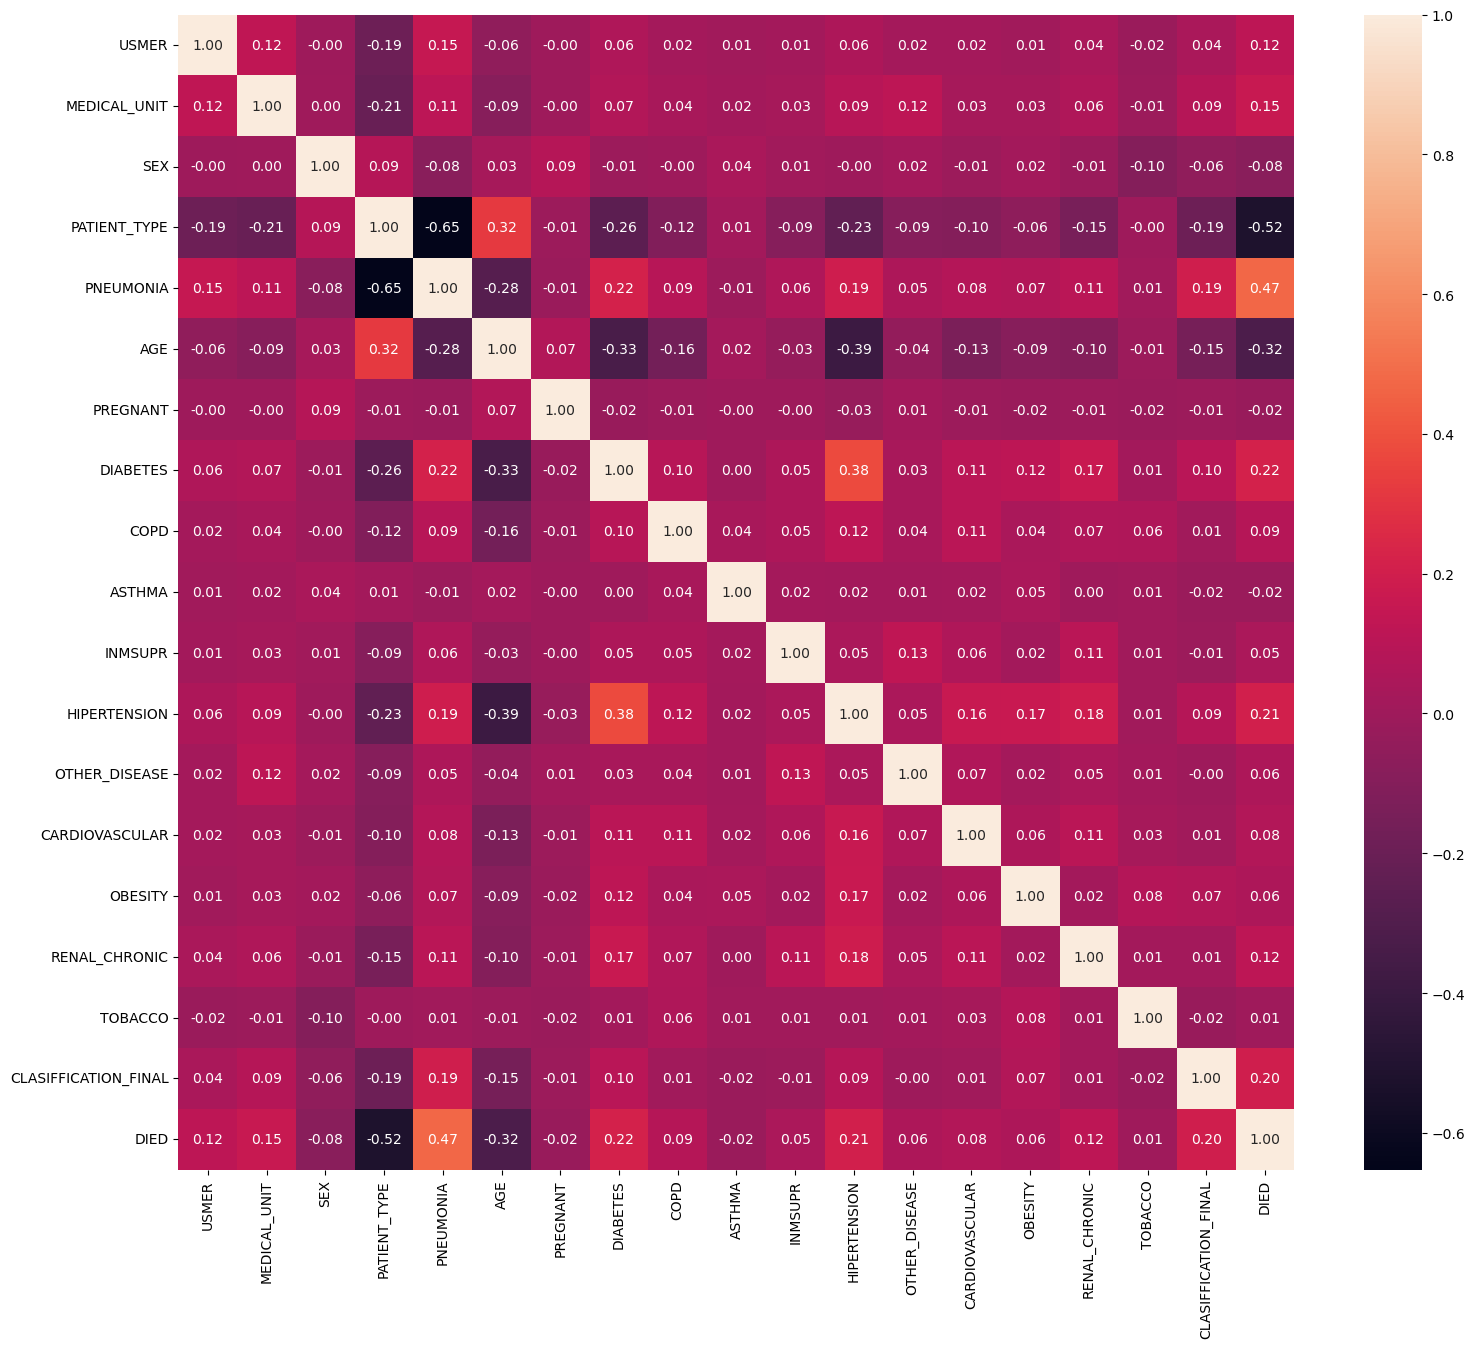

In [22]:
#Create heatmap displaying correlation coefficient between all features

plt.figure(figsize=(18, 15))
correlation = df.corr()

sns.heatmap(correlation, annot=True, fmt=".2f")

# Normalizing and Splitting the data

I will normalize the data, in particular age, since there is no other feature that can really be normalized.

In [23]:
model = LogisticRegression()

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df['AGE'] = scaler.fit_transform(df.loc[:,['AGE']])

In [25]:
X= df.drop('DIED', axis=1)
y = df['DIED']

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=32)

In [27]:
model.fit(X_train, y_train)

/Users/andrewchavarria/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

The model fails to converge. I will double the number of iterations to 200, and compare the accuracy of our model.

In [28]:
model_double = LogisticRegression(max_iter=200)
model_double.fit(X_train, y_train)

/Users/andrewchavarria/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200)

# Performance Metrics

In [29]:
# Use score method to get accuracy of model
score = model.score(X_test, y_test)
score2 = model_double.score(X_test, y_test)
print("Accuracy with Max iterations = 100 (default): "+str(score))
print("Accuracy with Max iterations = 200: "+str(score2))

Accuracy with Max iterations = 100 (default): 0.9367602431622806
Accuracy with Max iterations = 200: 0.9368187894577638


Using double the iterations, there is only a small improvement in accuracy. Convergence is not reached but is pretty close to minimal cost for parameters.

In [30]:
# Compute the confusion matrix for the original moel

from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test) 
cm = confusion_matrix(y_test,y_pred)
cm

array([[  6579,   8504],
       [  4458, 185425]])

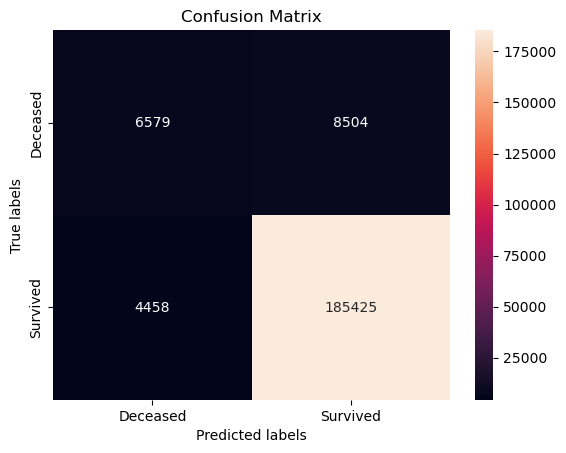

In [31]:
# Plot the confusion matrix onto a heatmap to display
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Deceased', 'Survived']); ax.yaxis.set_ticklabels(['Deceased', 'Survived']);

In [32]:
from sklearn.metrics import classification_report
 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.60      0.44      0.50     15083
           2       0.96      0.98      0.97    189883

    accuracy                           0.94    204966
   macro avg       0.78      0.71      0.73    204966
weighted avg       0.93      0.94      0.93    204966



# Improving model performance via up-sampling

As one can see, we are running into an issue with our dataset being imbalanced. There is an noticeable difference in the distribution of deceased and survivng COVID patients (over a 1:10 ratio).

If our model were to always predict 2 (a surviving patient), it would still achieve over a 90% success rate!

We will perform up-sampling of the minority class (deceased patients) to try and improve our model performance:

In [33]:
df_minority = df[df['DIED']==1]
df_majority = df[df['DIED']==2]

In [34]:
print(df_minority.shape)
print(df_majority.shape)

(74612, 19)
(950217, 19)


In [35]:
from sklearn.utils import resample
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=950217,    # to match majority class
                                 random_state=123) # reproducible results

In [36]:
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

[Text(0, 0, '950217'), Text(0, 0, '950217')]

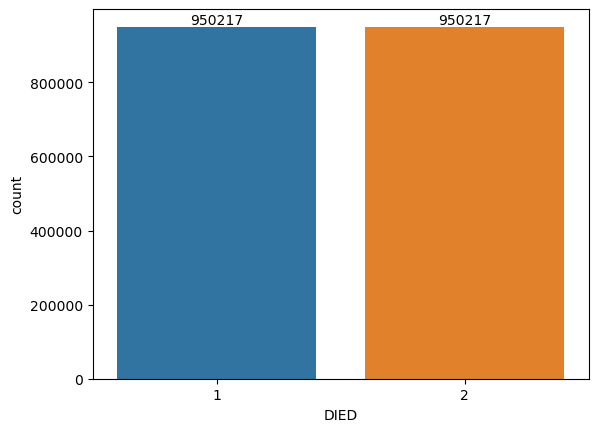

In [37]:
ax = sns.countplot(x=df_upsampled["DIED"])
plt.bar_label(ax.containers[0])

Using a simple heuristic of up-sampling enough random samples to match our majority class, we are ready to fit the model again.

In [38]:
X= df_upsampled.drop('DIED', axis=1)
y = df_upsampled['DIED']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=32)

In [39]:
model.fit(X_train, y_train)

/Users/andrewchavarria/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [40]:
# Compute the confusion matrix for the original moel
y_pred = model.predict(X_test) 
cm = confusion_matrix(y_test,y_pred)
cm

array([[175264,  15030],
       [ 20694, 169099]])

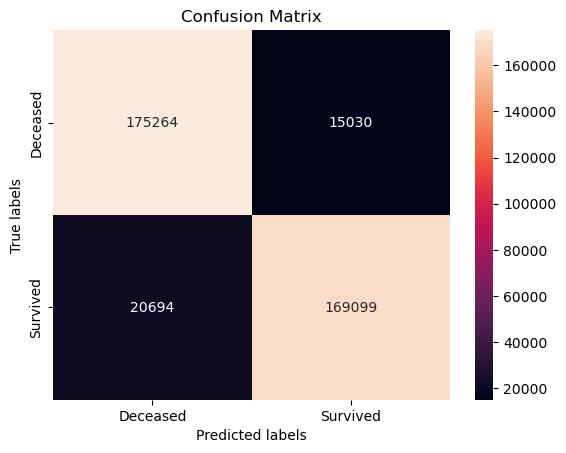

In [41]:
# Plot the confusion matrix onto a heatmap to display
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Deceased', 'Survived']); ax.yaxis.set_ticklabels(['Deceased', 'Survived']);

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.89      0.92      0.91    190294
           2       0.92      0.89      0.90    189793

    accuracy                           0.91    380087
   macro avg       0.91      0.91      0.91    380087
weighted avg       0.91      0.91      0.91    380087



Success! We have improved the prediction performance of our model. Precision, Recall, and F1 score have all increased substantially for our minority class. 